# Proyecto Final

#### Mónica Ángeles Sánchez 317159662

In [82]:
# Biblioteca:
import random
import networkx as nx
import matplotlib.pyplot as plot
import math

In [83]:
# Creamos una función que genera una solución aleatoria asignando un color aleatorio a cada vértice.

def solucion_aleatoria(num_vertices):
    rand = random.Random(42)
    solucion = []
    for i in range(num_vertices):
        color = rand.randint(1, num_vertices)
        solucion.append(color)
    return solucion

In [84]:
# Creamos una función que genera una solución vecina modificando el color de un vértice
# seleccionado aleatoriamente asegurándose de que la nueva solución cumpla con las
# restricciones del problema, es decir, que ningún vértice adyacente tenga el mismo color.

def generar_solucion_vecina(solucion_actual, matriz_adyacencia, num_vertices):
    solucion_vecina = solucion_actual[:]
    rand = random.Random()
    # Seleccionamos un vértice aleatorio
    vertice = rand.randint(0, num_vertices - 1)
    # Inicializa una lista para ver qué colores ya están asignados a los vértices adyacentes
    colores_usados = [False] * (num_vertices + 1)
    for i in range(num_vertices):
        # Si el vértice aleatorio y el vértice i son adyacentes, 
        # indicamos que el color solucion_actual[i] está siendo utilizado 
        if matriz_adyacencia[vertice][i] == 1:
            colores_usados[solucion_actual[i]] = True

    # Almacena la frecuencia de colores y el color
    frecuencias_colores = [[i, 0] for i in range(num_vertices + 1)]

    # Cuenta la frecuencia de cada color en la solución actual
    for color in solucion_actual:
        if color != 0:
            frecuencias_colores[color][1] += 1

    # Ordena los colores por su frecuencia de mayor a menor
    frecuencias_colores.sort(key=lambda x: x[1], reverse=True)

    # Intentar asignar el color más frecuente, luego el segundo más frecuente, y así sucesivamente
    for i in range(num_vertices):
        color_candidato = frecuencias_colores[i][0]
        if not colores_usados[color_candidato]:
            solucion_vecina[vertice] = color_candidato
            break
    # Regresa un arreglo de enteros que representan los colores de la solución vecina
    return solucion_vecina

In [85]:
# Creamos una función que toma como entrada una solución dada, que es una lista de colores
# asignados a cada vértice de una gráfica, y devuelve el número total de colores distintos 
# utilizados en esa solución para colorear la gráfica.

def evaluar_solucion(solucion):
    colores_usados = [False] * (num_vertices + 1)
    total_colores = 0
    # Itera sobre la solución, marca los colores ya utilizados y cuenta el número de apariciones
    for color in solucion:
        if not colores_usados[color]:
            colores_usados[color] = True
            total_colores += 1
    # Regresa el número de colores utilizados para colorear la gráfica
    return total_colores

In [86]:
# Creamos una función que implemente la búsqueda local siguiendo el pseudocódigo conocido.

def busqueda_local(num_max_iteraciones, matriz_adyacencia, num_vertices):
    # Parte de una solución inicial
    solucion_actual = solucion_aleatoria(num_vertices)
    # Evalúa la solución
    evaluacion_actual = evaluar_solucion(solucion_actual)

    # Inicializa los contadores
    # Cuenta las iteraciones consecutivas en las que no se ha encontrado una solución mejor.
    iteraciones = 0
    # Cuenta cuántas veces se ha mejorado la solución durante la búsqueda.
    mejoran=0
    # Mientras no se alcance el número máximo de iteraciones sin mejora que se permiten:
    while iteraciones < num_max_iteraciones:
        # Genera una solución vecina
        nueva_solucion = generar_solucion_vecina(solucion_actual,matriz_adyacencia, num_vertices)
        # Evalúa la solución vecina
        nueva_evaluacion = evaluar_solucion(nueva_solucion)
        # Si la solución vecina es mejor, la actualiza
        if nueva_evaluacion < evaluacion_actual:
            solucion_actual = nueva_solucion
            evaluacion_actual = nueva_evaluacion
            iteraciones = 0
            mejoran += 1
        # Si no es mejor, aumenta el número de iteraciones que llevamos
        else:
            iteraciones += 1
    # Devuelve un arreglo de enteros que representan los colores de la mejor solución encontrada
    return solucion_actual

In [87]:
# EJEMPLO 
# Definimos la matriz de adyacencia como una lista de listas
# La matriz de adyacencia representa una gráfica no dirigida con 10 vértices. 
# Cada fila de la matriz corresponde a un vértice, y el valor en la posición [i][j] indica si hay una arista 
# entre el vértice i y el vértice j (1 si hay una arista, 0 si no la hay).

matriz_adyacencia = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], # Vértice 0
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], # Vértice 1
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], # Vértice 2
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], # Vértice 3
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], # Vértice 4
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0], # Vértice 5
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], # Vértice 6
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], # Vértice 7
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], # Vértice 8
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] # Vértice 9
]


# Definimos el número de vértices
num_vertices = len(matriz_adyacencia)

# Número máximo de iteraciones sin mejora
num_max_iteraciones = 3000

In [88]:
# Ejecutamos la búsqueda local
solucion_final = busqueda_local(num_max_iteraciones, matriz_adyacencia, num_vertices)
solucion_final

[2, 1, 3, 4, 4, 3, 2, 1, 2, 1]

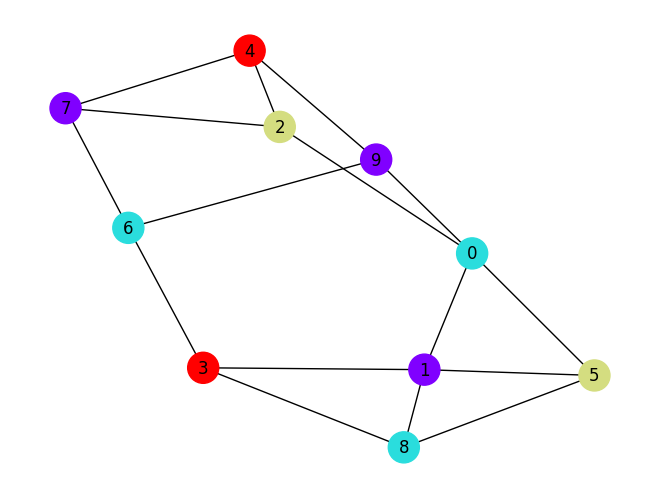

In [89]:
# Graficamos la solución obtenida

import matplotlib.pyplot as plt

# Creamos la función para dibujar la gráfica 
def dibujar_grafica(matriz_adyacencia, solucion_final):
    G = nx.Graph()
    # Se agrega cada vértice de la matriz como un nodo a la gráfica
    for i in range(len(matriz_adyacencia)):
        G.add_node(i)
    # Se agrega una arista entre los vértices i y j si la hay 
    for i in range(len(matriz_adyacencia)):
        for j in range(i + 1, len(matriz_adyacencia[i])):
            if matriz_adyacencia[i][j] == 1:
                G.add_edge(i, j)

    # Se asignan colores a los nodos según la solución final
    colors = [solucion_final[node] for node in G.nodes()]

    # Dibujamos la gráfica 
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia, solucion_final)
